In [5]:
#with import module_name as alias syntax we can use the imported module by refering it as alias
#for example here we can later use pd.Series instead of pandas.Series which is more convinient
import pandas as pd

In [ ]:
#indexing in list is done using integer "position"
a = [1 , 2, 3]
a[0]

1

In [2]:
#pandas dictionary is written in key value form with syntax; {key1: value1, key2: value2, ...}
#but the key must be unique else value for the key is overwritten with last assigned one
a = {'b': 1,
     'b':2,
     'c': 2}

#dictionary elements are indexed with element from key, if key dowsn't exist we get KeyError
#this form of indexing is very important infact list can be said as a dict with int indexing numbered from 0 to len -1
a['b']

2

#Pandas' basic objects and creation

##Series

Series can be viewed as an one dimensional array with labels that can be used for indexing similar to dict. In figure below we can access value of element 1 with index ['a'], similar for element; ['b'] and so on.

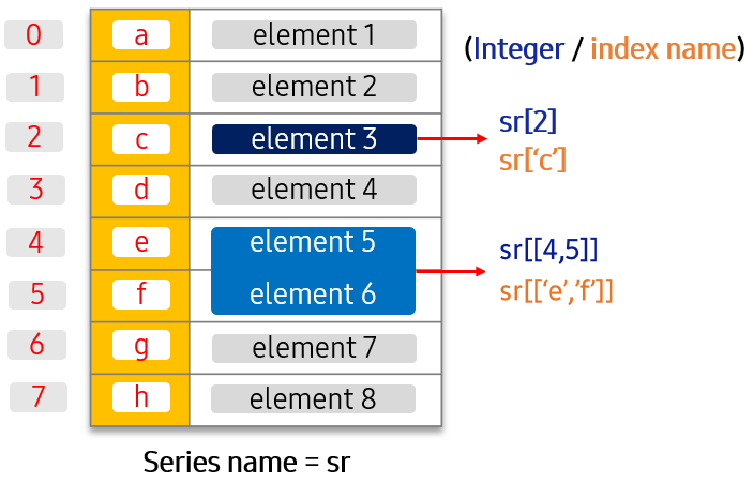

In [6]:
#creating a series object is as easy as passing a list on to the constructor of Pandas.Series class
list1 = [22, 35, 58]
ser1 = pd.Series(list1)
print(ser1)

0    22
1    35
2    58
dtype: int64


In [7]:
#here we can see that the series has a property dtype which represents the type of value it contains as a whole
ser1.dtype

dtype('int64')

In [18]:
#but since we can have any type of values in a list in python
list2_mixed_types = [22, 35.0, '58']
ser2 = pd.Series(list2_mixed_types)
ser2

,0
0,22
1,35.0
2,58


In [19]:
#the overall dtype is object (this dtype is what numpy uses in its logic as pandas is implemented using numpy)
print(type(ser2[0]))
print(type(ser2[1]))
print(type(ser2[2]))

<class 'int'>
<class 'float'>
<class 'str'>


In [20]:
#by default the indexing for series is also that like of list; starting from integer 0 to len - 1
print('Series length: ',len(ser2))
print(ser1[0])
print(ser1[1])
print(ser1[2])

Series length:  3
22
35
58


In [22]:
#but we can explicitly give it custom index by passing it as argument for parameter 'index'
#note that however the length of this index list must be same as the list used to create the series
#and the indexing is in same order as list elements
#index is also refered to as label in pandas
ser3 = pd.Series([22, 35, 58], index = ['a', 'a', 'c'])
ser3

,0
a,22
a,35
c,58


In [31]:
#note that type of value returned for index 'c' is simple numpy int
#whereas for index 'a' is a series itself (as it is (and can be) mapped to multiple elements unlike python dict)
print('Value at index "c" of Series3:', ser3['c'])
print('\n\nValue at index "a" of Series3:\n', ser3['a'])

print('\n\nType at index "c" of Series3:', type(ser3['c']))
print('Type at index "c" of Series3:', type(ser3['a']))

Value at index "c" of Series3: 58


Value at index "a" of Series3:
 a    22
a    35
dtype: int64


Type at index "c" of Series3: <class 'numpy.int64'>
Type at index "c" of Series3: <class 'pandas.core.series.Series'>


##DataFrame

Dataframe is another core object of Pandas directly used for processing data. Pandas dataframe can be visualized as a matrix or spreadsheet (like excel table) consisting of named column and indexed along rows.

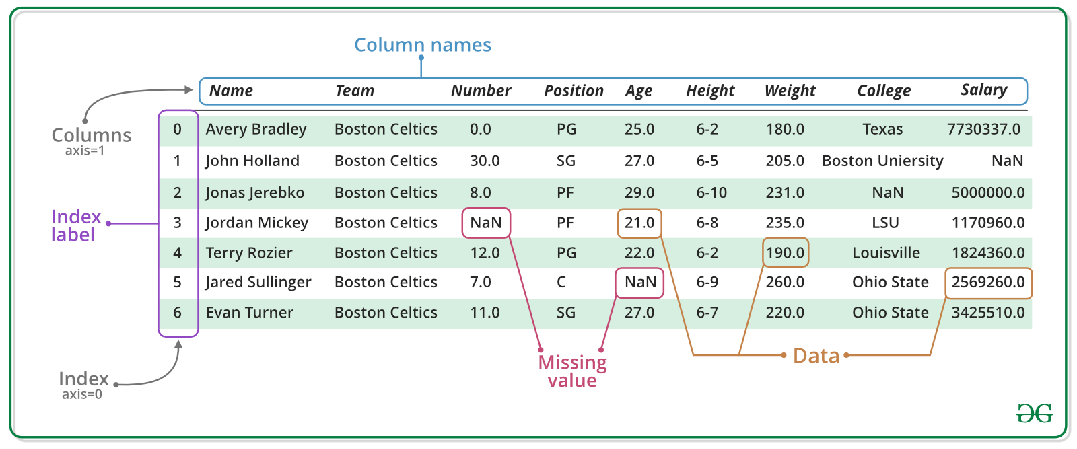

In [35]:
#for example to store the above data using pandas Dataframe object
#we may pass 2 dimensional list (i.e. list containing list of values), similar to how we see the table, to the constructor of DataFrame class
multidim_list = [["Avery Bradley",  "Boston Celtics",   0],
                 ["John Holland",   "Boston Celtics",   30],
                 ["Jonas Jerebko",  "Boston Celtics",   8],
                 ['Jordan Mickey',  "Boston Celtics",   12],
                 ['Terry Roizer',   'Boston Celtics',   12],
                 ['Jared Sullinger','Boston Celtics',   7],
                 ['Evan Turner',    'Boston Celtics',   11]
                 ]

df1_list = pd.DataFrame(multidim_list)
df1_list

,0,1,2
0,Avery Bradley,Boston Celtics,0
1,John Holland,Boston Celtics,30
2,Jonas Jerebko,Boston Celtics,8
3,Jordan Mickey,Boston Celtics,12
4,Terry Roizer,Boston Celtics,12
5,Jared Sullinger,Boston Celtics,7
6,Evan Turner,Boston Celtics,11


In [36]:
#or we can also use dictionary: dictionary keys will be used as column names/headers and the values in each list as column values under that respective column name.
#but note that while using 2 dimensional list, the column names were given by default as 0, 1, 2 ...
df2_dict = pd.DataFrame(
    {
        'Name': [
            "Avery Bradley",
            "John Holland",
            "Jonas Jerebko",
            'Jordan Mickey',
            'Terry Roizer',
            'Jared Sullinger',
            'Evan Turner'
        ],
        "Team": ['Boston Celtics'] * 7,
        "Number": [0, 30, 8, None, 12, 7, 11],
    }
)
df2_dict

,Name,Team,Number
0,Avery Bradley,Boston Celtics,0.0
1,John Holland,Boston Celtics,30.0
2,Jonas Jerebko,Boston Celtics,8.0
3,Jordan Mickey,Boston Celtics,NaN
4,Terry Roizer,Boston Celtics,12.0
5,Jared Sullinger,Boston Celtics,7.0
6,Evan Turner,Boston Celtics,11.0


In [38]:
#Each column in dataframe is actually a series
type(df1_list[0]) #the column with name 0

pandas.core.series.Series

In [ ]:
#similar to series we can view the types of data values stored under each column as a whole
#note that the type for Number column is float64 rather than int64.
#this is because one of the values is None which cant be represented equivalently in int
#so float is used which has a representation for NaN (Not a Number) which is used to represent result for operations like 0/0
df2_dict.dtypes

,0
Name,object
Team,object
Number,float64


**For other ways to create series and dataframe go through documentation:**

Series: https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series

DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

#Pandas' basic usage

##Working with tabular data stored in file

###Reading and quick information

In [90]:
#we can read data from various sources/format files like csv, excel, parquet, etc
#for example we can create a dataframe from csv file (which is very popular for datasets found online)
#this is a dataset downloaded from kaggle.com (which is the most popular site to get various datasets, explore on your own)
data_source = 'example_data.csv'
df3 = pd.read_csv(data_source)

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16531 entries, 0 to 16530
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       16531 non-null  object
 1   Country    16531 non-null  object
 2   Status     16531 non-null  object
 3   AQI Value  16531 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 516.7+ KB


In [79]:
#open the source csv file and you will see the first line as "Date,Country,Status,AQI Value"; also known as header
#which by default is used as colum names
#exlore on your own what to do to if there is no header and you will suppy the column names yourself
df3

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
16526,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
16527,2024-12-05,Uzbekistan,Moderate,83
16528,2024-12-05,Vatican,Moderate,95
16529,2024-12-05,Venezuela,Good,45


In [80]:
#we can get first 5 rows (by default) using .head() in dataframe
df3.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [68]:
#similarly we can get last rows using .tail(),
#the argument passed here (10) is the number of rows we would like to display
df3.tail(10)

,Date,Country,Status,AQI Value
16521,2024-12-05,Turkmenistan,Moderate,87
16522,2024-12-05,Uganda,Very Unhealthy,286
16523,2024-12-05,Ukraine,Moderate,54
16524,2024-12-05,United Arab Emirates,Moderate,60
16525,2024-12-05,United Kingdom of Great Britain and Northern I...,Moderate,54
16526,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
16527,2024-12-05,Uzbekistan,Moderate,83
16528,2024-12-05,Vatican,Moderate,95
16529,2024-12-05,Venezuela,Good,45
16530,2024-12-05,Vietnam,Moderate,53


In [69]:
#similarly we can save any dataframe object to required file/format
#for instance below we save the dataframe from above as excel file
df3.to_excel('example_data.xlsx')

###Selecting subset of elements

In [81]:
##selecting subset of columns
#passing list, instead of a sring column name as before, will return dataframe when using index notation on the dataframe
column_list = ['Date', 'Country', 'Status']
df3[column_list]

,Date,Country,Status
0,2022-07-21,Albania,Good
1,2022-07-21,Algeria,Moderate
2,2022-07-21,Andorra,Moderate
3,2022-07-21,Angola,Unhealthy for Sensitive Groups
4,2022-07-21,Argentina,Moderate
...,...,...,...
16526,2024-12-05,United States of America,Unhealthy for Sensitive Groups
16527,2024-12-05,Uzbekistan,Moderate
16528,2024-12-05,Vatican,Moderate
16529,2024-12-05,Venezuela,Good


In [101]:
##Selecting subset of rows and columns; df2.loc[row,column]
#row cab be specified in many forms such as slicing notation, as list,  a boolean list, etc
#note the first element in loc operator (row) refers to index which can be any type and order as required
#but here is conviniently a int and ordered by default
df3.loc[100:105, ('Date', 'Country', 'Status')]
#the notation above (100:105) is called slicing, review it before if had not used with python lists

,Date,Country,Status
100,2022-07-21,Pakistan,Moderate
101,2022-07-21,Palestinian Territory,Moderate
102,2022-07-21,Peru,Moderate
103,2022-07-21,Philippines,Moderate
104,2022-07-21,Poland,Moderate
105,2022-07-21,Portugal,Good


**For more details on what kind of forms can be used to access the elements go through:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc

In [82]:
#if we were to have different kind of indices
df3_reindexed = df3.copy()
df3_reindexed.index = df3['Date']
df3_reindexed

,Date,Country,Status,AQI Value
Date,,,,
2022-07-21,2022-07-21,Albania,Good,14
2022-07-21,2022-07-21,Algeria,Moderate,65
2022-07-21,2022-07-21,Andorra,Moderate,55
2022-07-21,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
2024-12-05,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
2024-12-05,2024-12-05,Uzbekistan,Moderate,83
2024-12-05,2024-12-05,Vatican,Moderate,95


In [83]:
#dropping/deleting column(s)
df3_reindexed.drop(columns = 'Date')
df3_reindexed

,Date,Country,Status,AQI Value
Date,,,,
2022-07-21,2022-07-21,Albania,Good,14
2022-07-21,2022-07-21,Algeria,Moderate,65
2022-07-21,2022-07-21,Andorra,Moderate,55
2022-07-21,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
2024-12-05,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
2024-12-05,2024-12-05,Uzbekistan,Moderate,83
2024-12-05,2024-12-05,Vatican,Moderate,95


Here, we clearly dropped the column "Date" but it seemed to have no effect. This is because it returns a new dataframe with column dropped. We can either assign this new dataframe to the previous variable or pass the argument value 'inplace = True'

In [84]:
#do df3_reindexed = df3_reindexed.drop(columns = 'Date') or
df3_reindexed.drop(columns = 'Date', inplace=True)
df3_reindexed

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63
...,...,...,...
2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
2024-12-05,Uzbekistan,Moderate,83
2024-12-05,Vatican,Moderate,95


In [85]:
#note how we access elements when the index is other than int
df3_reindexed.loc['2024-08-01':'2024-08-29', ['Country', 'Status']]

,Country,Status
Date,,
2024-08-01,Albania,Good
2024-08-01,Algeria,Good
2024-08-01,Andorra,Moderate
2024-08-01,Argentina,Moderate
2024-08-01,Armenia,Good
...,...,...
2024-08-29,Uzbekistan,Moderate
2024-08-29,Vatican,Good
2024-08-29,Venezuela,Good


Initially, the values in datetime are character strings and do not provide any datetime operations (e.g. extract the year, day of the week,…). By applying the to_datetime function, pandas interprets the strings and convert these to datetime (i.e. datetime64[ns, UTC]) objects.

In [91]:
print(df3['Date'].dtype)

object


In [93]:
#converting and assigning to the same column
df3['Date'] = pd.to_datetime(df3['Date'])

In [95]:
print(df3['Date'].dtype)

datetime64[ns]


There is another method of accesing/ selecting subset of elements from the dataframe. Using iloc[] operator similar to .loc but uses absolute integer positions instead (like in array)

In [100]:
#our reindexed dataframe doesn't have int index but we can use integer indexing with iloc
#this will give us rows from first 10 to 100-1 or 99 and colums from first (0) to 2-1 or 1
df3_reindexed.iloc[10:100,0:2]

,Country,Status
Date,,
2022-07-21,Bangladesh,Unhealthy for Sensitive Groups
2022-07-21,Belarus,Good
2022-07-21,Belgium,Moderate
2022-07-21,Belize,Good
2022-07-21,Bermuda,Good
...,...,...
2022-07-21,Netherlands,Moderate
2022-07-21,New Caledonia,Good
2022-07-21,New Zealand,Good


In [98]:
#this remains same irrespective of how the index was changed before
#but we cannot mix this position notation with that of loc,
#i.e. use int positions strictly for both rows and columns
df3.iloc[10:100,0:2]

,Date,Country
10,2022-07-21,Bangladesh
11,2022-07-21,Belarus
12,2022-07-21,Belgium
13,2022-07-21,Belize
14,2022-07-21,Bermuda
...,...,...
95,2022-07-21,Netherlands
96,2022-07-21,New Caledonia
97,2022-07-21,New Zealand
98,2022-07-21,Nigeria


In [103]:
#we can get the unique values under a column as
df3['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [104]:
#note the above returned value is of numpy type so you can use numpy methods
countries = df3['Country'].unique()
countries.sort()
print(countries)

['Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Bermuda' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao'
 'Macedonia' 'Madagascar' 'Malaysia' 'Malta' 'Martinique' 'Mexico'
 'Moldova' 'Mon

###Filtering

In [108]:
#this returns a series with True set to those rows where value for 'Country' column is 'Nepal'
condition1 = df3['Country'] == 'Nepal'
print(condition1)

0        False
1        False
2        False
3        False
4        False
         ...  
16526    False
16527    False
16528    False
16529    False
16530    False
Name: Country, Length: 16531, dtype: bool


In [109]:
#we can use this boolean series with loc; namely as the rows
#whereever there is True will be extracted in new dataframe
#note ":" on its own, without start and end, means all elements
df3_filtered_country_nepal = df3.loc[condition1, :]
df3_filtered_country_nepal

,Date,Country,Status,AQI Value
94,2022-07-21,Nepal,Moderate,81
236,2022-07-21,Nepal,Moderate,79
378,2022-07-22,Nepal,Moderate,58
519,2022-07-22,Nepal,Good,48
660,2022-07-22,Nepal,Good,26
...,...,...,...,...
16009,2024-11-07,Nepal,Moderate,76
16128,2024-11-14,Nepal,Unhealthy for Sensitive Groups,142
16247,2024-11-21,Nepal,Moderate,99
16367,2024-11-28,Nepal,Unhealthy for Sensitive Groups,120


In [115]:
#we can combine multiple boolean series using boolean operators
southeast_asia = ['Indonesia', 'Thailand', 'Myanmar', 'Cambodia', 'Philippines']
condition2 = (df3['Country'].isin(southeast_asia)) & ~(df3['AQI Value'] > 100)
#it is read as the country is in the list of southeast_asia and not having AQI Value greater than 100
#note the parenthesis around each sub-condition is required to enforce operation order else we may get error
df3_filtered_southeast_asia = df3.loc[condition2, ['Country', 'Status', 'AQI Value']]
df3_filtered_southeast_asia

,Country,Status,AQI Value
21,Cambodia,Good,15
60,Indonesia,Moderate,93
93,Myanmar,Good,46
103,Philippines,Moderate,83
127,Thailand,Moderate,95
...,...,...,...
16376,Philippines,Good,47
16396,Thailand,Moderate,91
16425,Cambodia,Moderate,62
16456,Indonesia,Moderate,91


In [110]:
#similarly we can filter out null values
df3.dropna()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
16526,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139
16527,2024-12-05,Uzbekistan,Moderate,83
16528,2024-12-05,Vatican,Moderate,95
16529,2024-12-05,Venezuela,Good,45


##Descriptive statistics

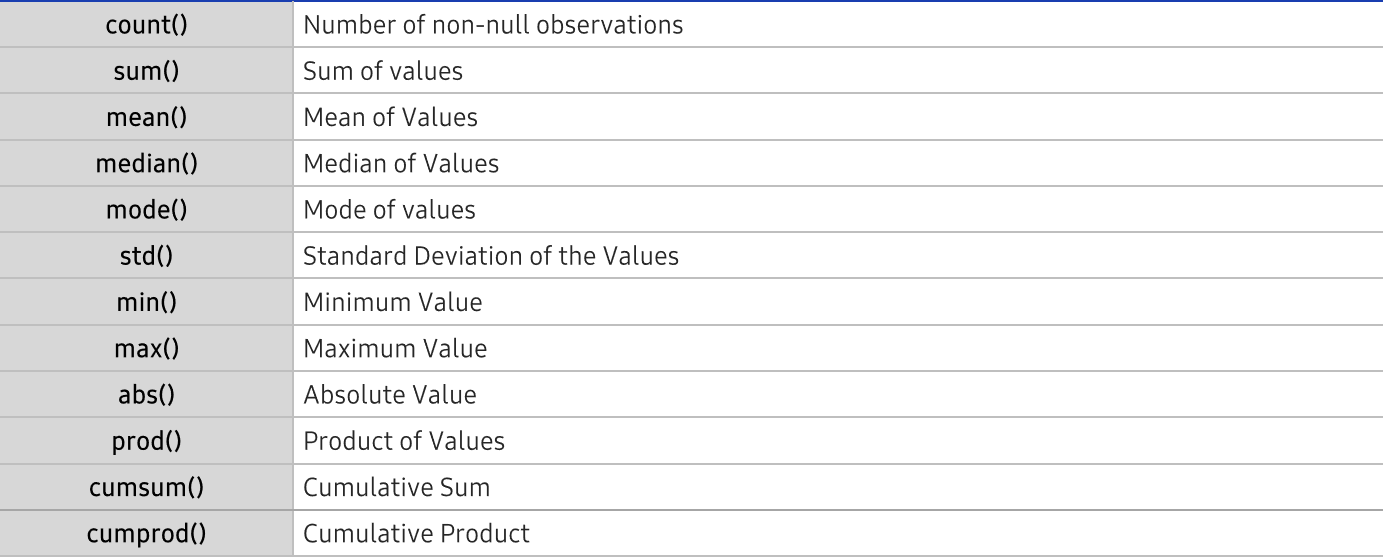

In [117]:
df3.head(3)

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55


In [118]:
df3.count()

,0
Date,16531
Country,16531
Status,16531
AQI Value,16531


In [119]:
#here since we changed the datatype for Date
#and the new datatype (datetime) doesn't support addition operation we get error
df3.sum()

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [122]:
#so we must filter out / drop the date-time column if we are to use these kinds of statistics
df3['AQI Value'].mean() #average AQI value

62.1551025346319

In [ ]:
#Explore other on your own

In [127]:
df2_dict

,Name,Team,Number
0,Avery Bradley,Boston Celtics,0.0
1,John Holland,Boston Celtics,30.0
2,Jonas Jerebko,Boston Celtics,8.0
3,Jordan Mickey,Boston Celtics,NaN
4,Terry Roizer,Boston Celtics,12.0
5,Jared Sullinger,Boston Celtics,7.0
6,Evan Turner,Boston Celtics,11.0


In [128]:
#we can also use describe method to get relevant statistics
#this will leave out any non numerical column
df2_dict.describe()

,Number
count,6.000000
mean,11.333333
std,10.073066
min,0.000000
25%,7.250000
50%,9.500000
75%,11.750000
max,30.000000


In [129]:
#however if there only non-numerical column then other kind of statistics will be returned
df2_dict[['Name', 'Team']].describe()

,Name,Team
count,7,7
unique,7,1
top,Avery Bradley,Boston Celtics
freq,1,7


###Creating new columns

In [146]:
##mathematical operators (+, -, *, /,…) or logical operators (<, >, ==,…) work element-wise based on index and column
df3['AQI Value Percent'] = df3['AQI Value'] / 500

In [131]:
df3

,Date,Country,Status,AQI Value,AQI Value Percent
0,2022-07-21,Albania,Good,14,0.028
1,2022-07-21,Algeria,Moderate,65,0.130
2,2022-07-21,Andorra,Moderate,55,0.110
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113,0.226
4,2022-07-21,Argentina,Moderate,63,0.126
...,...,...,...,...,...
16526,2024-12-05,United States of America,Unhealthy for Sensitive Groups,139,0.278
16527,2024-12-05,Uzbekistan,Moderate,83,0.166
16528,2024-12-05,Vatican,Moderate,95,0.190
16529,2024-12-05,Venezuela,Good,45,0.090


In [142]:

df4 = pd.DataFrame(
    {
        'a': [1, 2, 3, 4],
        'b': [4, 5, 3, 6],
        'c': [6, 2, 7, 8],
    }
)
df5 = pd.DataFrame(
    {
        'a': [1, 2, 3],
        'b': [4, 5, 3],
        'd': [6, 2, 7],
    },
    index = [0, 3, 6]
)

In [143]:
print(df4)

   a  b  c
0  1  4  6
1  2  5  2
2  3  3  7
3  4  6  8


In [144]:
print(df5)

   a  b  d
0  1  4  6
3  2  5  2
6  3  3  7


In [145]:
#try to explain what is happening here
df4 + df5

,a,b,c,d
0,2.0,8.0,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,6.0,11.0,NaN,NaN
6,NaN,NaN,NaN,NaN


In [ ]:
df2_renamed = df2.rename(
    columns={
        "AQI Value" : "Air quality",
        "AQI Value Percent" : "Air quality ratio",
    }
)
df2_renamed

###Combining mutliple tables

In [147]:
#appending along row or column
pd.concat([df4, df5], axis = 0)

,a,b,c,d
0,1,4,6.0,NaN
1,2,5,2.0,NaN
2,3,3,7.0,NaN
3,4,6,8.0,NaN
0,1,4,NaN,6.0
3,2,5,NaN,2.0
6,3,3,NaN,7.0


In [149]:
pd.concat([df4, df5], axis = 1)

,a,b,c,a,b,d
0,1.0,4.0,6.0,1.0,4.0,6.0
1,2.0,5.0,2.0,NaN,NaN,NaN
2,3.0,3.0,7.0,NaN,NaN,NaN
3,4.0,6.0,8.0,2.0,5.0,2.0
6,NaN,NaN,NaN,3.0,3.0,7.0


In [151]:
#explore and understand on your own (very important!!)
pd.merge(df4, df5, on = 'a', how='inner')

,a,b_x,c,b_y,d
0,1,4,6,4,6
1,2,5,2,5,2
2,3,3,7,3,7


###Grouping

In [153]:
#groups based on some columns
#explore on your own (also important!!)
df3_grouped = df3.groupby('Country')

In [155]:
#so now aggregate functions (functions that combines data from multiple rows) like sum(), mean(), max(), etc
#works in group instead of on whole column
df3_grouped['AQI Value'].mean() #mean AQI value of each contry from the data

,AQI Value
Country,
Albania,26.545455
Algeria,59.760684
Andorra,30.132231
Angola,109.462366
Argentina,36.842975
...,...
Uzbekistan,70.245763
Vatican,45.586777
Venezuela,15.771186
